<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.


#### Project Title: The Sepsis Illness Classification Analysis

#### Project Description: This project seeks to create a classification model to classify patients Sepsis positive or negative 

#### Hypothesis: 
#### Null Hypothesis: 
#### Alternate Hypothesis: 
####
#### Assumptions:
1. It assumed that no patient can have any of the attributes as 0
2. It was assumed that the blood pressure used was the diastolic type.


#### Questions

1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?
2. What is the distribution of ages for patients captured in the data?
3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?
4. Is Body Mass Index affected by Age?
5. Is Blood Pressure affected by Age?
6. What is the relationship between Age and Body In



## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df = pd.read_csv('../datasets/Paitients_Files_Train.csv')
df.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# display the datatypes
df.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

>- **All the data types are of numeric data types**

In [5]:
# check the shape of the data
df.shape

(599, 11)

>- **The dataset has 11 columns and 599 rows**

In [6]:
# check for null values
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

>- **All rows had values**

In [7]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

>- **The columns are not descriptive**

In [8]:
# check the number of duplicates
df.duplicated().sum()

0

>- **There are no duplicates**

In [9]:
# create a function to print the number of unique values
def print_unique_values(data):
    values = {}
    for col in data.columns:
        number = data[col].nunique()
        print(f'{col}: has {number} of unique values')   

In [10]:
print_unique_values(df)

ID: has 599 of unique values
PRG: has 17 of unique values
PL: has 129 of unique values
PR: has 44 of unique values
SK: has 51 of unique values
TS: has 164 of unique values
M11: has 233 of unique values
BD2: has 437 of unique values
Age: has 50 of unique values
Insurance: has 2 of unique values
Sepssis: has 2 of unique values


In [11]:
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [12]:
number_of_zeros(df)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 93
Count of zeros in Column  PL : 5
Count of zeros in Column  PR : 28
Count of zeros in Column  SK : 175
Count of zeros in Column  TS : 289
Count of zeros in Column  M11 : 9
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


>- **Although there were no null values in the columns, some of the columns had 0's in the them**

Observations from the data:

Quality Issues

>- The column names are not descripive
>- Columns can't have a value of zero

#### Rename the columns

In [13]:
df = df.rename(columns={'PRG': 'Plasma Glucose', 'PL': 'Blood Work Result-1',
                        'PR': 'Blood Pressure','SK': 'Blood Work Result-2',
                        'TS': 'Blood Work Result-3', 'M11': 'Body Mass Index',
                        'BD2': 'Blood Work Result-4'})

In [14]:
# Confirm the rename of columns
df.head()

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Replace the zero values with the mean of the each column


In [15]:
# Make a copy of the dataframe
data = df.copy()

In [16]:
non_zero_columns = data.drop(columns=['Insurance']).columns
print(data['Insurance'].median())
print(non_zero_columns)
# replace the zeros
data[non_zero_columns] = data[non_zero_columns].replace(0, data.median())

# display the head 
data.head()

1.0
Index(['ID', 'Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body Mass Index',
       'Blood Work Result-4', 'Age', 'Sepssis'],
      dtype='object')


,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,36,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,36,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,23,36,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive


In [17]:
# confirm that zeros  have been replaced
number_of_zeros(data)

Count of zeros in Column  ID : 0
Count of zeros in Column  Plasma Glucose : 0
Count of zeros in Column  Blood Work Result-1 : 0
Count of zeros in Column  Blood Pressure : 0
Count of zeros in Column  Blood Work Result-2 : 0
Count of zeros in Column  Blood Work Result-3 : 0
Count of zeros in Column  Body Mass Index : 0
Count of zeros in Column  Blood Work Result-4 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


#### Check statistics of the data using the describe() method

In [18]:
data.describe()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
count,599.000000,599.00000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,4.290484,121.12187,72.005008,27.282137,96.829716,32.400835,0.481187,33.290484,0.686144
std,2.987000,30.76739,11.917146,9.451984,105.589923,6.968917,0.337552,11.828446,0.464447
min,1.000000,44.00000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.00000,64.000000,23.000000,36.000000,27.400000,0.248000,24.000000,0.000000
50%,3.000000,116.00000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.00000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


>- **The mean age for the patients captured is 33.29. The mean blood pressure is 72.005008 mm hg which is lower than 80 mm hg, hence indicates that the patients had averagely a normal pressure**

#### Check the correlation between the various columns

In [19]:
# find the correlation between the columns
corr_matrix = data.corr()
corr_matrix

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
Plasma Glucose,1.000000,0.162758,0.215305,0.059698,-0.037116,0.090942,-0.023184,0.531537,0.092346
Blood Work Result-1,0.162758,1.000000,0.211836,0.171060,0.370484,0.219501,0.144238,0.278614,0.048320
Blood Pressure,0.215305,0.211836,1.000000,0.132071,-0.009141,0.267228,-0.040316,0.308668,-0.045639
Blood Work Result-2,0.059698,0.171060,0.132071,1.000000,0.236868,0.541551,0.137004,0.053799,0.004968
Blood Work Result-3,-0.037116,0.370484,-0.009141,0.236868,1.000000,0.176072,0.210755,0.023575,0.046749
Body Mass Index,0.090942,0.219501,0.267228,0.541551,0.176072,1.000000,0.136123,0.011698,0.027929
Blood Work Result-4,-0.023184,0.144238,-0.040316,0.137004,0.210755,0.136123,1.000000,0.033567,0.006114
Age,0.531537,0.278614,0.308668,0.053799,0.023575,0.011698,0.033567,1.000000,0.054368
Insurance,0.092346,0.048320,-0.045639,0.004968,0.046749,0.027929,0.006114,0.054368,1.000000


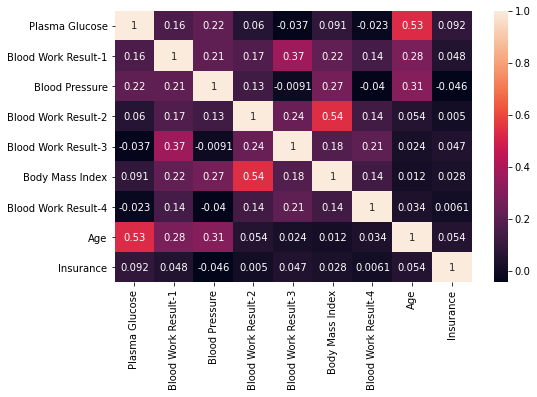

In [20]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [21]:
# get the minimum value
min_corr = corr_matrix.min().min()  
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.04563895493502899
The columns involved are: ('Blood Pressure', 'Insurance')


In [22]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())  
# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax()) 

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.5415508816494893
The columns involved are: ('Blood Work Result-2', 'Body Mass Index')


>- **The lowest correlation is -0.12155329275228288 between Blood Work Result-2 and Age.** 

>- **The highest correlation is 0.5325446086908504 between Plasma Glucose and Age**

#### Verify label balance

In [23]:
# value count for values in Sepssis

label_counts = df['Sepssis'].value_counts()
label_counts

Negative    391
Positive    208
Name: Sepssis, dtype: int64

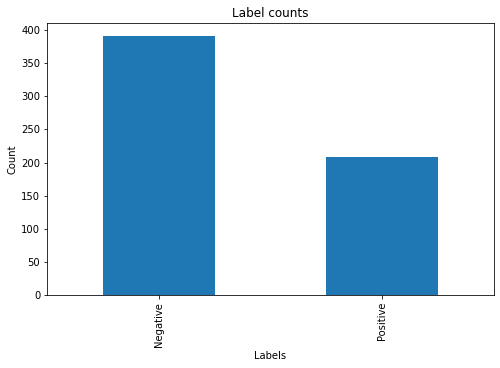

In [24]:
plt.figure(figsize=(8, 5))
label_counts.plot.bar()
plt.title('Label counts')
plt.xlabel('Labels')
plt.ylabel('Count');

>- **The number of patients who tested negative were almost twice as many as the ones that tested positve. Clearly the data is slightly unbalanced**

In [25]:
print(f"The maximum age is {df['Age'].max()} and minimum age {df['Age'].min()}.")
age_count = df['Age'].value_counts()
age_count

The maximum age is 81 and minimum age 21.


21    52
22    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
36    13
32    13
38    13
46    11
35    10
39    10
34     9
40     8
43     8
45     8
44     7
58     7
51     7
60     5
57     5
52     5
54     4
62     4
55     4
50     4
47     4
53     3
49     3
59     3
48     3
63     3
65     3
66     3
67     3
56     2
61     2
64     1
69     1
72     1
81     1
Name: Age, dtype: int64

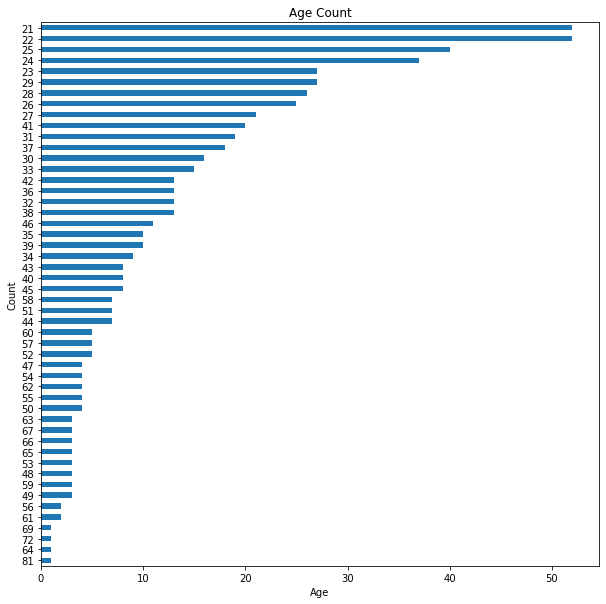

In [26]:
plt.figure(figsize=(10, 10))
age_count.sort_values(ascending=True).plot(kind='barh')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count');

>- **52 of the patients were 22 years old, that was the hisghest number of times an age occured**

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### 1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?


The follwing are the bmi ranges

>- under 18.5 – This is described as underweight.
>- between 18.5 and 24.9 – This is described as the 'healthy range'.
>- between 25 and 29.9 – This is described as overweight.
>- between 30 and 39.9 – This is described as obesity.
>- 40 or over – This is described as severe obesity.

In [27]:
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['Body Mass Index'] <= 18.5):
        return 'Under Weight'
    elif (row['Body Mass Index'] > 18.5) and (row['Body Mass Index'] <= 24.9):
        return 'Healthy Weight'
    elif (row['Body Mass Index'] > 24.9) and (row['Body Mass Index'] <= 29.9):
        return 'Over Weight'
    elif (row['Body Mass Index'] > 29.9) and (row['Body Mass Index'] < 40):
        return 'Obesity'
    elif row['Body Mass Index'] >= 40:
        return 'Severe Obesity'

In [28]:
data['BMI Ranges'] = data.apply(create_bmi_range, axis=1)
range_count = data['BMI Ranges'].value_counts()

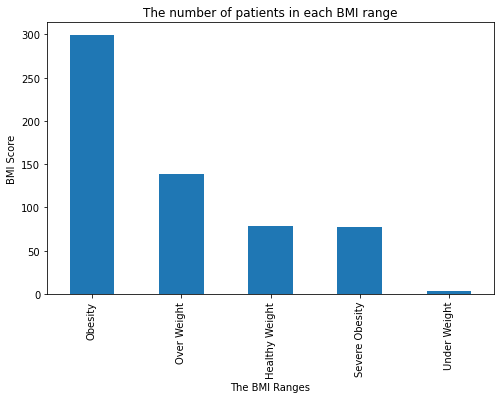

In [29]:
# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('BMI Score')
plt.show()

>- Based on the graph above, most of the of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

### 2. What is the distribution of ages for patients captured in the data?

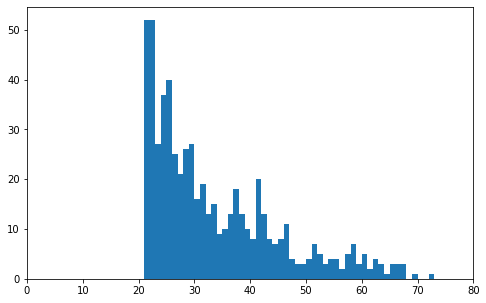

In [30]:

age_bins = np.arange(0, data['Age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'Age', bins=age_bins);
plt.xlim(0, 80);

>-  From the distribution of ages most of the patients fell within the range 20 years to 40 years.

### 3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?

In [31]:
# create a function to create a new column called blood pressure ranges
def blood_pressure_ranges(row):
    if row['Blood Pressure'] < 80:
        return 'normal'
    elif row['Blood Pressure'] >= 80 and row['Blood Pressure'] <= 89:
        return 'elevated'
    elif row['Blood Pressure'] >= 90:
        return 'high'


In [32]:
# create new column
data['Blood pressure category'] = data.apply(blood_pressure_ranges, axis=1)
data['Blood pressure category'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Blood pressure category, dtype: object

In [33]:
BP_range = data['Blood pressure category'].value_counts()

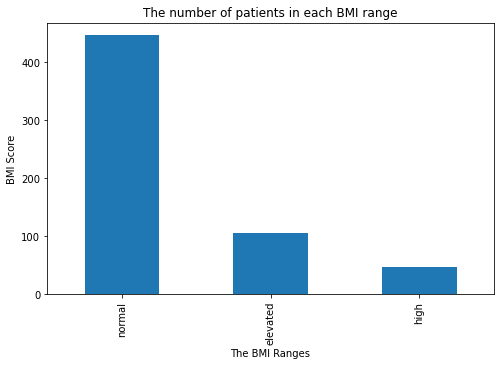

In [34]:
plt.figure(figsize=(8, 5))
BP_range.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('BMI Score')
plt.show()

>- From the graph above more than 400 patients fell under the normal blood pressure category, followed by the elevated then high.

## Bivariate Analysis

### 4. Is Body Mass Index affected by Age?

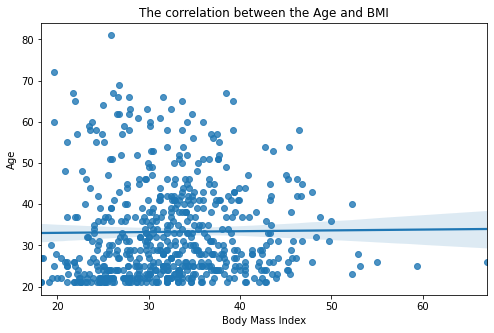

In [35]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Body Mass Index', y='Age', data=data)
plt.title('The correlation between the Age and BMI')
plt.show()

In [36]:
corr = data['Body Mass Index'].corr(data['Age'])
round(corr, 6)

0.011698

>- The correlation between ages and M11(bmi) is alsmot a straight line. This means it is  very small. The correlation was 0.011801.

### 5. Is Blood Pressure affected by Age?

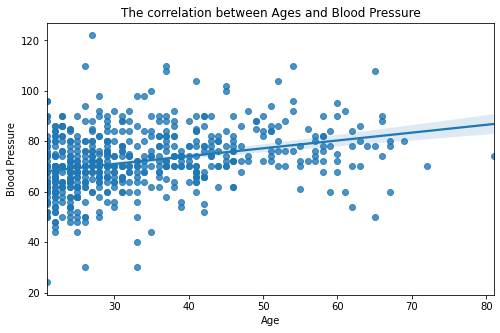

In [37]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Blood Pressure', data=data)
plt.title('The correlation between Ages and Blood Pressure')
plt.ylabel('Blood Pressure')
plt.show();

In [38]:
corr_ = data['Blood Pressure'].corr(data['Age'])
round(corr_, 6)

0.308668

>- From the graph there is slightly a strong correlation between blood pressure and ages. The values was 0.30937

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 6. What is the relationship between Age and Body Mass Index Ranges and Sepsis?

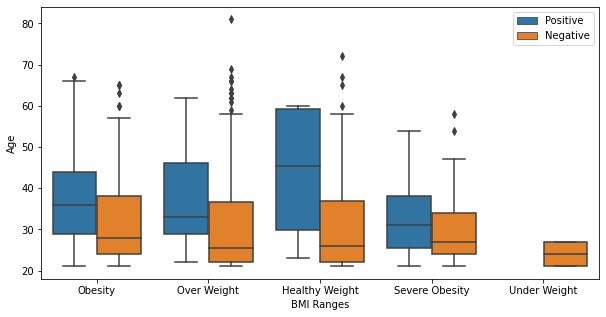

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y='Age', x='BMI Ranges', hue='Sepssis');
# plt.ylim(-10, 3500);
plt.legend();

>- From the graph above,  most people that tested positive for sepsis had healthy weights and fell between the ages of  25 to 60. The Obesity category which had more number of patient recorded less patients who tested positive for sepsis.

### How does Blood Pressure and Plasma glucose affect the Sepssis 

In [40]:
# create function to plot facet grids
def plot_facet_grid(data, x, y, z, title, xlabel, ylabel):
    facet = sns.FacetGrid(data = data, col = z, col_wrap = 2, height = 5,
                     xlim = [10, 80], ylim = [-500, 9000])
    facet.map(plt.scatter, x, y, alpha= 1)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.set(xlim=(0, 20))
    facet.set(ylim=(0, 200))
    facet.fig.suptitle(title, fontsize=14, fontweight='bold', y=1.05)

#     facet.fig.suptitle(title, )
    plt.show()

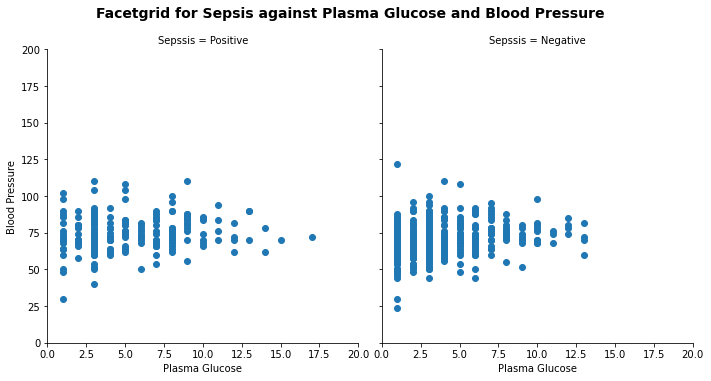

In [41]:
facet_sepssis = plot_facet_grid(data, 'Plasma Glucose', 'Blood Pressure', 'Sepssis', 
                                  'Facetgrid for Sepsis against Plasma Glucose and Blood Pressure', \
                                  'Plasma Glucose', 'Blood Pressure')
facet_sepssis

>- In both Positive and Negative Sepsis there is almost no correlation btween Plasma and Blood Pressure

<AxesSubplot:xlabel='Age', ylabel='count'>

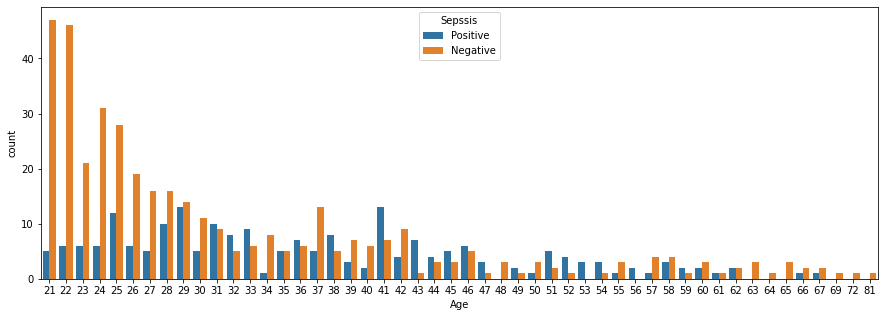

In [42]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', data=data, hue='Sepssis')

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [43]:
# display columns in dataframe
df.columns

Index(['ID', 'Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body Mass Index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

In [44]:
# # Replace zeros in the dataset
# # get columns to replace 
# non_zero_columns = df.drop(columns=['Insurance']).columns

# # print columns to confirm
# print(non_zero_columns)
# # replace the zeros
# df[non_zero_columns] = df[non_zero_columns].replace(0, df[non_zero_columns].mean())


In [45]:
number_of_zeros(df)

Count of zeros in Column  ID : 0
Count of zeros in Column  Plasma Glucose : 93
Count of zeros in Column  Blood Work Result-1 : 5
Count of zeros in Column  Blood Pressure : 28
Count of zeros in Column  Blood Work Result-2 : 175
Count of zeros in Column  Blood Work Result-3 : 289
Count of zeros in Column  Body Mass Index : 9
Count of zeros in Column  Blood Work Result-4 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


In [46]:
df.head(5)

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Dataset Splitting

In [47]:
# Drop the ID column
df_ = df.drop(columns=['ID'])
df_['Insurance'] = df['Insurance'].astype('category')
df_.head(2)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative


In [48]:
df_.dtypes

Plasma Glucose            int64
Blood Work Result-1       int64
Blood Pressure            int64
Blood Work Result-2       int64
Blood Work Result-3       int64
Body Mass Index         float64
Blood Work Result-4     float64
Age                       int64
Insurance              category
Sepssis                  object
dtype: object

In [49]:
#  change values in Sepsis column into numerical data
df_['Sepssis'] = (df_['Sepssis'] == 'Positive').astype(bool).astype(int)
df_['Sepssis'].unique()

array([1, 0])

In [50]:
# display data
df_.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1


In [51]:
df_corr = df_.corr()
df_corr['Sepssis'].sort_values(ascending=False)

Sepssis                1.000000
Blood Work Result-1    0.449719
Body Mass Index        0.315894
Age                    0.210234
Plasma Glucose         0.207115
Blood Work Result-4    0.181561
Blood Work Result-3    0.145892
Blood Work Result-2    0.075585
Blood Pressure         0.061086
Name: Sepssis, dtype: float64

In [52]:
# Use train_test_split with a random_state, and add stratify for Classification

#spliting data into  80% train and  20% test

train, test = train_test_split(df_, test_size=0.2, random_state=42)

In [53]:
# create features and targets from the train data
X_train = train.drop(columns=['Sepssis'])
y_train = train['Sepssis'].copy()

# create features and targets from test data
X_test = test.drop(columns=['Sepssis'])
y_test = test['Sepssis'].copy()


In [54]:
# display head fo the train features dataframe
X_train.head()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
145,0,102,75,23,0,0.0,0.572,21,1
9,8,125,96,0,0,0.0,0.232,54,1
375,12,140,82,43,325,39.2,0.528,58,1
522,6,114,0,0,0,0.0,0.189,26,1
188,8,109,76,39,114,27.9,0.640,31,0


In [55]:
# displayhead for the test features dataframe

X_test.head()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
110,3,171,72,33,135,33.3,0.199,24,1
419,3,129,64,29,115,26.4,0.219,28,1
564,0,91,80,0,0,32.4,0.601,27,0
77,5,95,72,33,0,37.7,0.370,27,1
181,0,119,64,18,92,34.9,0.725,23,0


## New Features Creation

In [56]:
# create features the BMI_Range and BP_Range for x_train
X_train['BMI_Range'] = X_train.apply(create_bmi_range, axis=1)
X_train['BP_range'] = X_train.apply(blood_pressure_ranges, axis=1)

In [57]:
X_train.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,BMI_Range,BP_range
145,0,102,75,23,0,0.0,0.572,21,1,Under Weight,normal
9,8,125,96,0,0,0.0,0.232,54,1,Under Weight,high
375,12,140,82,43,325,39.2,0.528,58,1,Obesity,elevated


In [58]:
# create features the BMI_Range and BP_Range for x_test
X_test['BMI_Range'] = X_test.apply(create_bmi_range, axis=1)
X_test['BP_range'] = X_test.apply(blood_pressure_ranges, axis=1)

In [59]:
X_test.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,BMI_Range,BP_range
110,3,171,72,33,135,33.3,0.199,24,1,Obesity,normal
419,3,129,64,29,115,26.4,0.219,28,1,Over Weight,normal
564,0,91,80,0,0,32.4,0.601,27,0,Obesity,elevated


In [60]:
# get the min and max o fthe ages
age_min = df['Age'].min()
age_max = df['Age'].max()

# create a new column 'Age Group'
age_labels =['{0}-{1}'.format(i, i+30) for i in range(0, age_max,20)]
X_train['Age Group'] = pd.cut(X_train['Age'], bins=(range(0, 120, 20)), right=False, labels=age_labels)
X_test['Age Group'] = pd.cut(X_test['Age'], bins=(range(0, 120, 20)), right=False, labels=age_labels)

print(age_labels)

['0-30', '20-50', '40-70', '60-90', '80-110']


In [61]:
X_test['Age Group']

110    20-50
419    20-50
564    20-50
77     20-50
181    20-50
       ...  
399    20-50
340    20-50
148    60-90
494    20-50
439    20-50
Name: Age Group, Length: 120, dtype: category
Categories (5, object): ['0-30' < '20-50' < '40-70' < '60-90' < '80-110']

In [62]:
X_train = X_train.drop(columns=['Blood Pressure', 'Age', 'Body Mass Index'])
X_test = X_test.drop(columns=['Blood Pressure', 'Age', 'Body Mass Index'])

# X_train = X_train.drop(columns=['Age'])
# X_test = X_test.drop(columns=['Age'])

In [63]:
# df[['Blood Work Result-1', 'Blood Work Result-2', 'Blood Work Result-3', 'Blood Work Result-4']] = \
#  df[['Blood Work Result-1', 'Blood Work Result-2', 'Blood Work Result-3', 'Blood Work Result-4']].astype(int)

# bwr1_min = df['Blood Work Result-1'].min()
# bwr1_max = df['Blood Work Result-1'].max()

# bwr1_labels =['{0}-{1}'.format(i, i+20) for i in range(bwr1_min, bwr1_max, 20)]
# # X_train['BRW1 Group'] = pd.cut(X_train['Blood Work Result-1'], bins=(range(0, 105, 15)), right=False, labels=bwr1_labels)
# # X_test['BRW1 Group'] = pd.cut(X_test['Blood Work Result-1'], bins=(range(0, 105, 15)), right=False, labels=bwr_labels)
# print(bwr1_labels)

In [64]:
# bwr2_min = df['Blood Work Result-2'].min()
# bwr2_max = df['Blood Work Result-2'].max()

# bwr2_labels =['{0}-{1}'.format(i, i+20) for i in range(bwr2_min, bwr_max2, 20)]
# # X_train['BRW2 Group'] = pd.cut(X_train['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# # X_test['BRW2 Group'] = pd.cut(X_test['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# print(bwr2_labels)

In [65]:
# bwr_min = df['Blood Work Result-2'].min()
# bwr_max = df['Blood Work Result-2'].max()

# labels =['{0}-{1}'.format(i, i+15) for i in range(bwr_min, bwr_max, 15)]
# # X_train['BRW2 Group'] = pd.cut(X_train['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# # X_test['BRW2 Group'] = pd.cut(X_test['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# print(labels)

In [66]:
# bwr_min = df['Blood Work Result-2'].min()
# bwr_max = df['Blood Work Result-2'].max()

# labels =['{0}-{1}'.format(i, i+15) for i in range(bwr_min, bwr_max, 15)]
# # X_train['BRW2 Group'] = pd.cut(X_train['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# # X_test['BRW2 Group'] = pd.cut(X_test['Blood Work Result-2'], bins=(range(0, 105, 15)), right=False, labels=labels)
# print(labels)

In [67]:
# X_test.head(3)

In [68]:
# X_train.head(3)

## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [69]:
# check and confirm the shape of the train and test data
train.shape, test.shape

((479, 10), (120, 10))

In [70]:
# select the categorical columns from train and test data for encoding
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
test_cat_cols = X_test.select_dtypes(include=['object', 'category']).columns
train_cat_cols == test_cat_cols

array([ True,  True,  True,  True])

In [71]:
# select numerical columns from the train and test dataset
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns
test_num_cols=X_test.select_dtypes(exclude=['object', 'category']).columns

# # confirm if numerical columns are same for test and train data
test_num_cols == train_num_cols

array([ True,  True,  True,  True,  True])

In [72]:
# create variables to hold numerical and categorical columns 
num_attribs = list(train_num_cols)
cat_attribs = list(train_cat_cols)
print(num_attribs, cat_attribs)

['Plasma Glucose', 'Blood Work Result-1', 'Blood Work Result-2', 'Blood Work Result-3', 'Blood Work Result-4'] ['Insurance', 'BMI_Range', 'BP_range', 'Age Group']


In [73]:
#create a numerical pipeline to standardize and impute the missinf in the numerical columns
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="most_frequent")),('std_scaler', StandardScaler())])

#create a categorical pipeline to encode and impute the missing in the numerical columns
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy="most_frequent")),('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [74]:
# Create a fullpipeline by combining numerical and catagorical pioeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs), ("categorical",cat_pipeline, cat_attribs)], )

In [75]:
# use create pipeline to transform train and test features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [76]:
# 

In [77]:
# get categorical columns after transformation
cat_features = full_pipeline.named_transformers_['categorical']['cat_encoder'].get_feature_names()
cat_features

array(['x0_0', 'x0_1', 'x1_Healthy Weight', 'x1_Obesity',
       'x1_Over Weight', 'x1_Severe Obesity', 'x1_Under Weight',
       'x2_elevated', 'x2_high', 'x2_normal', 'x3_20-50', 'x3_40-70',
       'x3_60-90', 'x3_80-110'], dtype=object)

In [78]:
columns_ = np.concatenate([train_num_cols, cat_features])

In [79]:
X_train_df = pd.DataFrame(X_train_prepared, columns=columns_)
X_train_df = X_train_df.rename(columns={'x0_0':'Insurance_0', 'x0_1': 'Insurance_1'})
X_train_df.head()

,Plasma Glucose,Blood Work Result-1,Blood Work Result-2,Blood Work Result-3,Blood Work Result-4,Insurance_0,Insurance_1,x1_Healthy Weight,x1_Obesity,x1_Over Weight,x1_Severe Obesity,x1_Under Weight,x2_elevated,x2_high,x2_normal,x3_20-50,x3_40-70,x3_60-90,x3_80-110
0,-1.134318,-0.562061,0.129634,-0.686284,0.298699,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.222898,0.165922,-1.299975,-0.686284,-0.760484,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.401505,0.640694,1.372772,2.148272,0.161629,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.633594,-0.182244,-1.299975,-0.686284,-0.894440,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.222898,-0.340501,1.124144,0.307991,0.510536,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [80]:
X_train_df.shape

(479, 19)

In [81]:
X_test_df = pd.DataFrame(X_test_prepared, columns=columns_)
X_test_df = X_test_df.rename(columns={'x0_0':'Insurance_0', 'x0_1': 'Insurance_1'})

X_test_df.head()

,Plasma Glucose,Blood Work Result-1,Blood Work Result-2,Blood Work Result-3,Blood Work Result-4,Insurance_0,Insurance_1,x1_Healthy Weight,x1_Obesity,x1_Over Weight,x1_Severe Obesity,x1_Under Weight,x2_elevated,x2_high,x2_normal,x3_20-50,x3_40-70,x3_60-90,x3_80-110
0,-0.250362,1.621890,0.751203,0.491147,-0.863287,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.250362,0.292528,0.502576,0.316713,-0.800982,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.134318,-0.910228,-1.299975,-0.686284,0.389042,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.338942,-0.783622,0.751203,-0.686284,-0.330580,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.134318,-0.023986,-0.181150,0.116113,0.775332,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [82]:
# Code here
len(X_test_df)

120

## Optional: Train Dataset Balancing 

In [83]:
# # Count the number of unique values in the target
# y_train.value_counts()

In [84]:
# y_test.value_counts()

In [85]:
# # import the SMOTE technique to oversample the minority
# from imblearn.over_sampling import RandomOverSampler, SMOTE

In [86]:
# # Create an instance of SMOTE and fit it on the train feature and targets
# sm = RandomOverSampler(sampling_strategy='minority')
# X_train_df, y_train = sm.fit_resample(X_train_df, y_train)

In [87]:
# # # let's confirm the increase in rows after oversampling
# len(X_train_df), len(y_train)

In [88]:
# # Confirm values counts for the targets
# y_train.value_counts()

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Logistic Regression

Please, keep the following structure to try all the model you want.

### Create the Model

In [89]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()

### Train the Model

In [90]:
# Use the .fit method to train the model
lgr_model.fit(X_train_df, y_train)

LogisticRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [91]:
def evaluate_model(model, x_test, y_test):
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    return accuracy, f1, precision, recall


In [92]:
accuracy, f1, precision, recall = evaluate_model(lgr_model, X_test_df, y_test)
accuracy, f1, precision, recall

(0.775, 0.6666666666666666, 0.7105263157894737, 0.627906976744186)

In [93]:
results = pd.DataFrame([['Logistic Regression', accuracy, f1, precision, recall]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.775,0.666667,0.710526,0.627907


>- 

## XBoost

Please, keep the following structure to try all the model you want.

### Create the Model

In [94]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

### Train the Model

In [95]:
# Use the .fit method
xgb_model.fit(X_train_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [96]:
accuracy, f1, precision, recall = evaluate_model(xgb_model, X_test_df, y_test)
accuracy, f1, precision, recall

(0.725, 0.6292134831460675, 0.6086956521739131, 0.6511627906976745)

In [97]:
model_result = pd.DataFrame([['XGBoost', accuracy, f1, precision, recall]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.775,0.666667,0.710526,0.627907
0,XGBoost,0.725,0.629213,0.608696,0.651163


>-

## Support Vector Machine

### Create the Model

In [98]:
# Create the svm  model
from sklearn import svm
svm = svm.SVC()

### Train the Model

In [99]:
# Use the .fit method
svm.fit(X_train_df, y_train)

SVC()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [100]:
accuracy, f1, precision, recall = evaluate_model(svm, X_test_df, y_test)
accuracy, f1, precision, recall

(0.7333333333333333,
 0.6190476190476191,
 0.6341463414634146,
 0.6046511627906976)

In [101]:
model_result = pd.DataFrame([['Support Vector Machine', accuracy, f1, precision, recall]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.775000,0.666667,0.710526,0.627907
0,XGBoost,0.725000,0.629213,0.608696,0.651163
0,Support Vector Machine,0.733333,0.619048,0.634146,0.604651


>- 

## Decision tree

### Create the Model

In [102]:
# Code here
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

### Train the Model

In [103]:
# Use the .fit method
dtc.fit(X_train_df, y_train)

DecisionTreeClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [104]:
accuracy, f1, precision, recall = evaluate_model(dtc, X_test_df, y_test)
accuracy, f1, precision, recall

(0.7083333333333334, 0.5783132530120482, 0.6, 0.5581395348837209)

In [105]:
model_result = pd.DataFrame([['Decision Tree Classifier', accuracy, f1, precision, recall]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.775000,0.666667,0.710526,0.627907
0,XGBoost,0.725000,0.629213,0.608696,0.651163
0,Support Vector Machine,0.733333,0.619048,0.634146,0.604651
0,Decision Tree Classifier,0.708333,0.578313,0.600000,0.558140


## Random Forest

### Create the Model

In [106]:
# Code here

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6, n_estimators=100)

### Train the Model

In [107]:
# Use the .fit method
rfc.fit(X_train_df, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [108]:
accuracy, f1, precision, recall = evaluate_model(rfc, X_test_df, y_test)
accuracy, f1, precision, recall

(0.7666666666666667, 0.6585365853658537, 0.6923076923076923, 0.627906976744186)

In [109]:
model_result = pd.DataFrame([['Random Forest Classifier', accuracy, f1, precision, recall]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.775000,0.666667,0.710526,0.627907
0,XGBoost,0.725000,0.629213,0.608696,0.651163
0,Support Vector Machine,0.733333,0.619048,0.634146,0.604651
0,Decision Tree Classifier,0.708333,0.578313,0.600000,0.558140
0,Random Forest Classifier,0.766667,0.658537,0.692308,0.627907


>- 

In [110]:
----

SyntaxError: invalid syntax (<ipython-input-110-759c4c5efcf3>, line 1)

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# from sklearn.metrics import SCORERS

In [ ]:
# # make f2 a scorer
# f2_scorer = make_scorer(fbeta_score, beta=2)
# accuracy_score = make_scorer(accuracy_score)
# f1_score = make_scorer(f1_score)
# precision_score = make_scorer(precision_score)


scoring = {
    'accuracy': accuracy_score,
    'f1_score': f1_score,
    'precision': precision_score
}

### Model Tuning for Logistic Rgression Classifier

In [ ]:
# Code here
from sklearn.model_selection import GridSearchCV
param_grid= [{'penalty': ['l1', 'l2'],\
             'C': [0.001,0.009,0.01,5, 6.4, 7, 10,25], 'intercept_scaling':[1, 3.7, 2, 4.3, 7, 10],\
              'max_iter': [5, 50, 100, 150, 200, 400, 300, 500], 'class_weight':['balanced'], \
              'solver':['saga', 'liblinear'], 'tol': 10.0 ** -np.arange(1, 7), 'l1_ratio': np.arange(0,1, 0.2) }]

In [ ]:
# create a bayessearchcv to finetune the logistic regression model
logistic_grid_search = GridSearchCV(lgr_model,param_grid, scoring=scoring, cv=5, return_train_score=True, refit='f1_score')

In [ ]:
# train the model
logistic_grid_search.fit(X_train_df, y_train)

In [ ]:
# get the best parameter from the bayesearch
best_lgr = logistic_grid_search.best_estimator_
best_lgr

In [ ]:
X_test_df

In [ ]:
type([y_test])

In [ ]:
pred = best_lgr.predict(X_test_df)

In [ ]:
pred

In [ ]:
---

In [ ]:
from sklearn.metrics import recall_score , precision_score, f1_score, accuracy_score

In [ ]:
accuracy, f1, precision, recall = evaluate_model(best_lgr, X_test_df, y_test)

In [ ]:
accuracy, f1, precision, recall

In [ ]:
tuned_results_bcv = pd.DataFrame([['Logistic Regression Classifier-finetuned', accuracy, f1, precision, recall
]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])

In [ ]:
tuned_results_bcv

In [ ]:
//

### Model Tuning for Random Forest Classifier

In [ ]:
# Create the parameter bayes search 
param_grid_rfc = {
    'bootstrap': [True], 
    'max_features': [2, 3, 9], 
    'min_samples_split': [8, 10, 12], 
    'n_estimators': [100, 200, 300, 1000], 
    'random_state':[100,  120, 150], 
    'min_samples_leaf':[8, 6, 10, 7],
    'max_depth': [6, 8, 9, 80, 90, 100]
}

In [ ]:
import gc
gc.collect()

In [ ]:
# create a bayessearchcv to finetune the Support Vectors Machines regression model

rfc_grid_search = GridSearchCV(rfc, param_grid_rfc, scoring=scoring, cv=5, return_train_score=True, refit='f1_score')

In [ ]:
# train the model
rfc_grid_search.fit(X_train_df, y_train)

In [ ]:
# # get the bbest eestimator
# rfc_bayes_search.best_estimator_

In [ ]:
# rfc_results_bcv = pd.DataFrame([['Random Forest Classifier-finetuned', accuracy, f1, precision, recall
# ]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall'])
# tuned_results_bcv.append(rfc_results_bcv)

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [111]:
# Save the model and the columntransformer
import pickle
import os

import os

# Navigate to the desired directory
directory = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src', 'app', 'assets'))

# Save the model as a pickle file
filename = os.path.join(directory, 'model.pkl')
pickle.dump(lgr_model, open(filename, 'wb'))



In [112]:
filename2 = os.path.join(directory, 'full_pipeline.pkl')
pickle.dump(full_pipeline, open(filename2, 'wb') )

Model	Accuracy	F1_score	Precision	Recall
0	Logistic Regression	0.741667	0.607595	0.666667	0.558140
0	XGBoost	0.725000	0.637363	0.604167	0.674419
0	Support Vector Machine	0.716667	0.575000	0.621622	0.534884
0	Decision Tree Classifier	0.716667	0.622222	0.595745	0.651163



replaced zeros with median

0	Logistic Regression	0.750000	0.625000	0.675676	0.581395
0	XGBoost	0.716667	0.622222	0.595745	0.651163
0	Support Vector Machine	0.725000	0.592593	0.631579	0.558140
0	Decision Tree Classifier	0.708333	0.623656	0.580000	0.674419
0	Random Forest Classifier	0.733333	0.619048	0.634146	0.604651


mean

In [ ]:
%ls